<h1><center>IMDB Movie Analysis</center></h1>

## Website link https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page={page_number}

###Problem statement :<br>
1)Analyzing Movie Trends and success factors<br>
2)Predicting Movie ratings
<br>
3)Visualizing Movie Data For Actionable insights

### Importing required libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

movie_names = []
ratings = []
years = []
durations = []
grades = []
metascores = []

page_number = 1

while len(movie_names) < 500:
    url = f"https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page={page_number}"
    #  print(url)
    page = requests.get(url, headers={"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36"})
    soup = BeautifulSoup(page.text, 'html.parser')

    movie_list = soup.find_all("h3", class_="ipc-title__text")

    # Break the loop if no movies are found (end of pages)
    if not movie_list:
        break

    for tag in movie_list:
        text = tag.text.strip()
        if text.startswith('More to explore') or text.startswith('Recently viewed'):
            continue
        # Remove the ranking part (e.g., "1. The Godfather" becomes "The Godfather")
        name = ' '.join(text.split()[1:]).strip()
        movie_names.append(name)

    scraped_ratings = soup.find_all("span", class_="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating")
    for rating_elem in scraped_ratings:
        rating_str = rating_elem.get_text().strip()  # Get the text content and strip any extra whitespace
        # Use regular expression to find numeric ratings with decimal point
        rating = re.search(r'(\d+\.\d+)', rating_str)
        if rating:
            ratings.append(float(rating.group()))  # Convert the matched rating to float and append to ratings list

    scraped_year = soup.find_all("span", class_="sc-b189961a-8 kLaxqf dli-title-metadata-item")
    for year_list in scraped_year:
        year_texts = year_list.get_text().split()  # Split the text into individual components
        for year_text in year_texts:
            if year_text.isdigit():  # Check if the component is a digit (likely a year)
                years.append(int(year_text))  # Convert the year to integer and append to years list

        # Extract duration using regular expression
        match = re.search(r'(\d+h \d+m)', year_list.get_text())
        if match:
            durations.append(match.group())

        # Extract grade (if present)
        if len(year_list.get_text().strip()) == 1 and year_list.get_text().strip().isalpha():
            grades.append(year_list.get_text().strip())

    # Extract metascores
    scraped_metascore = soup.find_all("span", class_="sc-b0901df4-0 bcQdDJ metacritic-score-box")
    for tag in scraped_metascore:
        score = tag.text.strip()
        metascores.append(score)

    page_number += 1

    # Break the loop if more than 500 movie names are collected
    if len(movie_names) >= 500:
        break

# Ensure lists are sliced to exactly 500 items in case of extra scraped data
movie_names = movie_names[:500]
ratings = ratings[:500]
years = years[:500]
durations = durations[:500]
grades = grades[:500]
metascores = metascores[:500]

# Print lengths to verify
print("Movie Names:", len(movie_names))
print("Ratings:", len(ratings))
print("Years:", len(years))
print("Durations:", len(durations))
print("Grades:", len(grades))
print("Metascores:", len(metascores))

# Display 500 grades
print("500 Grades:")
print(grades)


Movie Names: 500
Ratings: 500
Years: 500
Durations: 500
Grades: 260
Metascores: 500
500 Grades:
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'

### Creating dataframe

In [3]:
df = pd.DataFrame({
    'Movie Name': movie_names,
    'Rating': ratings,
    'Year': years,
    'Duration': durations,

    'Metascore': metascores
})

# Display the DataFrame
df

,Movie Name,Rating,Year,Duration,Metascore
0,The Godfather,9.2,1972,2h 55m,100
1,The Silence of the Lambs,8.6,1991,1h 58m,86
2,Star Wars: Episode V - The Empire Strikes Back,8.7,1980,2h 4m,82
3,The Shawshank Redemption,9.3,1994,2h 22m,82
4,The Shining,8.4,1980,2h 26m,68
...,...,...,...,...,...
495,Apocalypse Now,8.4,1979,2h 27m,94
496,12 Angry Men,9.0,1957,1h 36m,97
497,The Lord of the Rings: The Two Towers,8.8,2002,2h 59m,87
498,Terminator 2: Judgment Day,8.6,1991,2h 17m,75


### Converting dataframe to csv file

In [4]:
df.to_csv("movies.csv")

### read csv file

In [6]:
data=pd.read_csv(r"/content/movies.csv")

In [7]:
df=data.copy()

In [8]:
df

,Unnamed: 0,Movie Name,Rating,Year,Duration,Metascore
0,0,The Godfather,9.2,1972,2h 55m,100
1,1,The Silence of the Lambs,8.6,1991,1h 58m,86
2,2,Star Wars: Episode V - The Empire Strikes Back,8.7,1980,2h 4m,82
3,3,The Shawshank Redemption,9.3,1994,2h 22m,82
4,4,The Shining,8.4,1980,2h 26m,68
...,...,...,...,...,...,...
495,495,Apocalypse Now,8.4,1979,2h 27m,94
496,496,12 Angry Men,9.0,1957,1h 36m,97
497,497,The Lord of the Rings: The Two Towers,8.8,2002,2h 59m,87
498,498,Terminator 2: Judgment Day,8.6,1991,2h 17m,75


### Exploratory Data Analysis

Dropping unnamed column because it acts as the index but by default dataframe have index.

In [9]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [10]:
df.columns

Index(['Movie Name', 'Rating', 'Year', 'Duration', 'Metascore'], dtype='object')

In [11]:
df.duplicated().sum()

475

In [12]:
df.head()

,Movie Name,Rating,Year,Duration,Metascore
0,The Godfather,9.2,1972,2h 55m,100
1,The Silence of the Lambs,8.6,1991,1h 58m,86
2,Star Wars: Episode V - The Empire Strikes Back,8.7,1980,2h 4m,82
3,The Shawshank Redemption,9.3,1994,2h 22m,82
4,The Shining,8.4,1980,2h 26m,68


head() returns the top n rows by but default it returns top 5 rows.

In [13]:
df.shape

(500, 5)

In this dataset there are 500 rows and 5 columns.

### Data cleaning

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Movie Name  500 non-null    object 
 1   Rating      500 non-null    float64
 2   Year        500 non-null    int64  
 3   Duration    500 non-null    object 
 4   Metascore   500 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 19.7+ KB


In [15]:
print(df.describe())


           Rating         Year   Metascore
count  500.000000   500.000000  500.000000
mean     8.680000  1983.760000   85.520000
std      0.307554    15.784826   10.594058
min      8.100000  1942.000000   58.000000
25%      8.400000  1977.000000   82.000000
50%      8.600000  1982.000000   86.000000
75%      9.000000  1994.000000   94.000000
max      9.300000  2010.000000  100.000000


In [16]:
print(df.isnull().sum())

Movie Name    0
Rating        0
Year          0
Duration      0
Metascore     0
dtype: int64


### Visualization

**Distribution of Movie Ratings (Histogram)**
This histogram shows how movie ratings are distributed across the dataset.

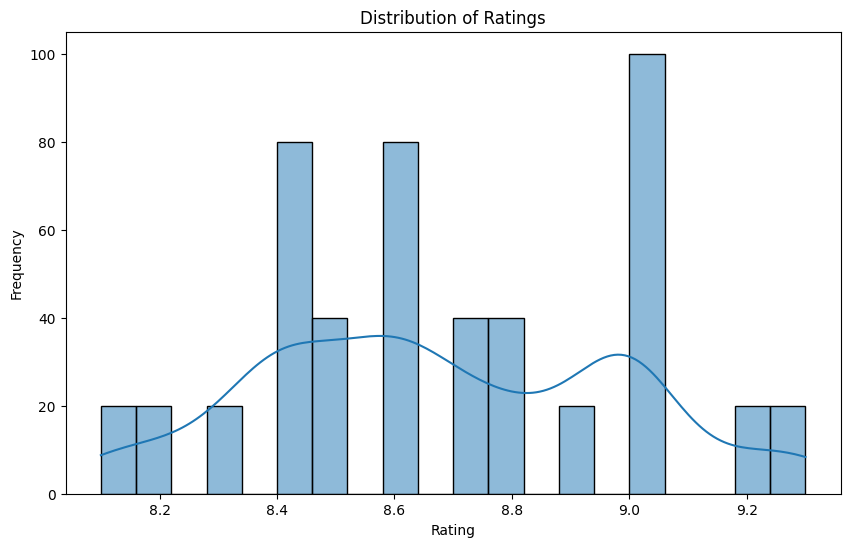

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Rating
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


fillna() is used to fill the null values

**Distribution of Movie Release Years (Box Plot)**
This box plot provides a visual summary of the distribution of movie release years, showing the median, quartiles, and potential outliers.

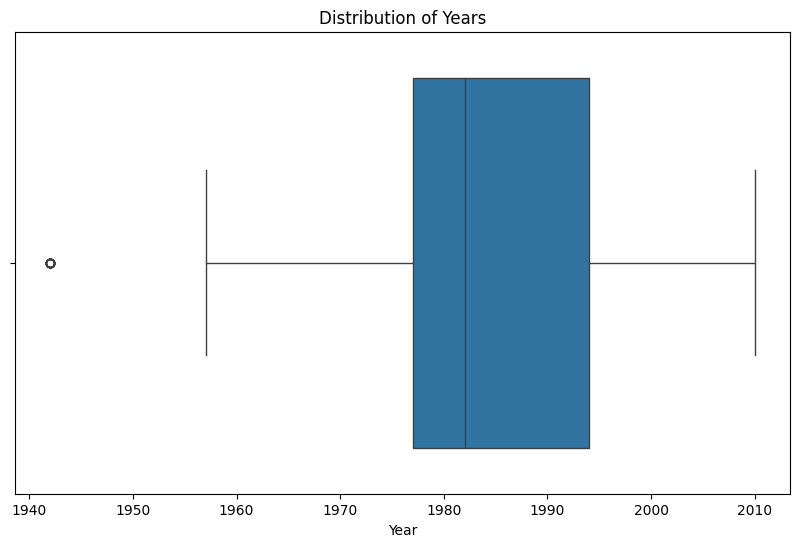

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Year'])
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.show()


**Rating vs Metascore (Scatter Plot)**
This scatter plot explores the relationship between IMDb ratings and Metascores, revealing any potential correlations or trends.

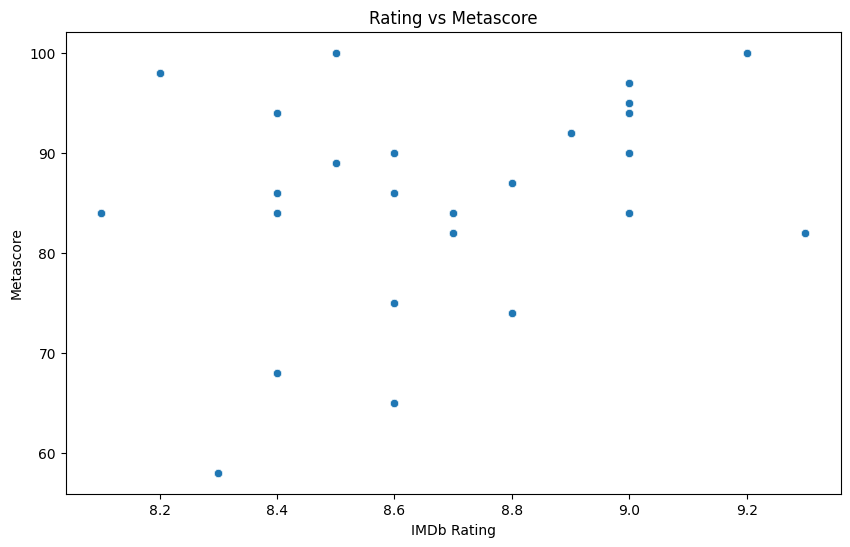

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Metascore', data=df)
plt.title('Rating vs Metascore')
plt.xlabel('IMDb Rating')
plt.ylabel('Metascore')
plt.show()

**Number of Movies Released Each Year (Line Chart)**
This line chart shows the trend of movie releases over the years, highlighting any significant increases or decreases in production.

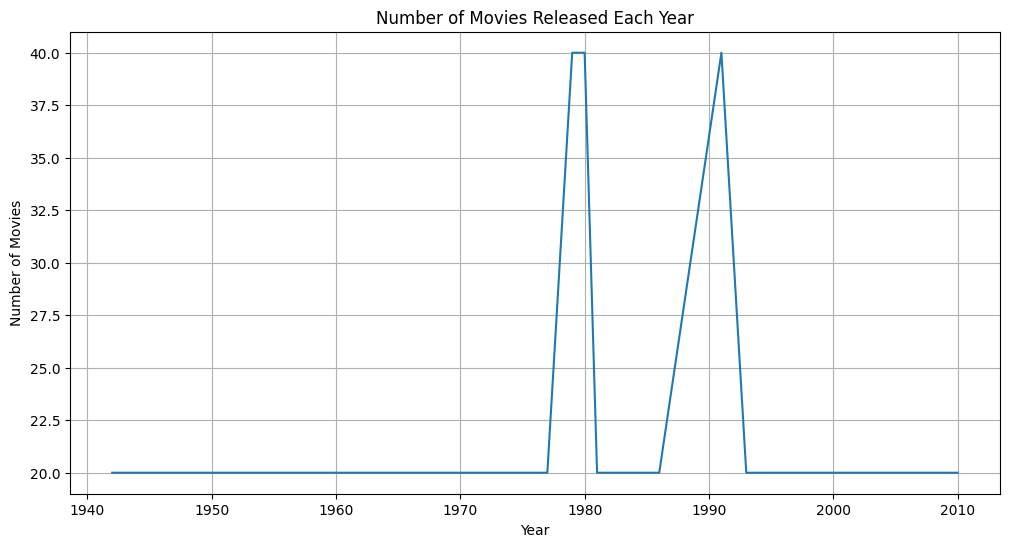

In [27]:
yearly_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values)
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

**Average Rating by Year (Line Chart)**
This line chart displays how the average rating of movies has changed over the years, providing insights into potential trends in movie quality.

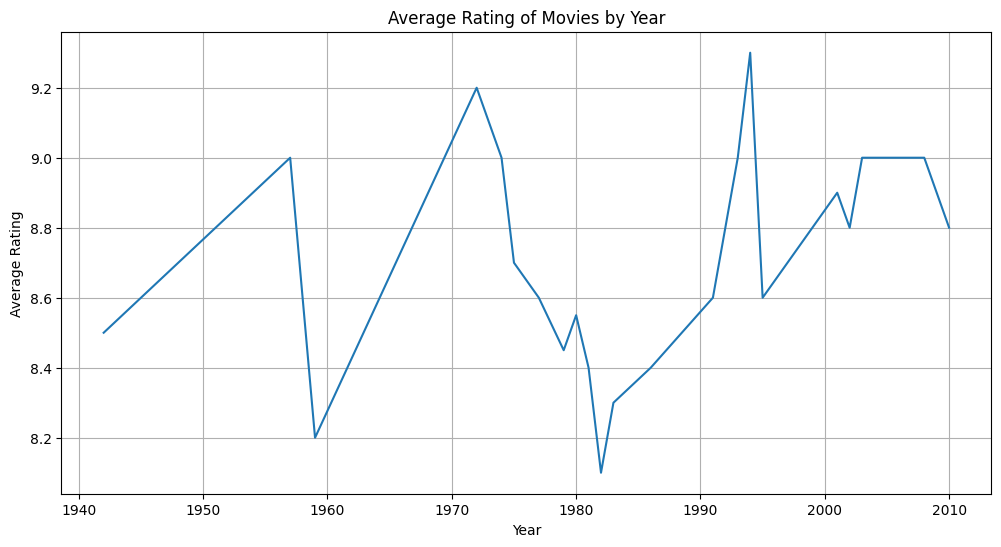

In [28]:
average_rating_by_year = df.groupby('Year')['Rating'].mean()

plt.figure(figsize=(12, 6))
plt.plot(average_rating_by_year.index, average_rating_by_year.values)
plt.title('Average Rating of Movies by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

**Distribution of Movie Durations (Histogram)**
This histogram shows the distribution of movie durations, giving an idea of the typical length of movies in the dataset.

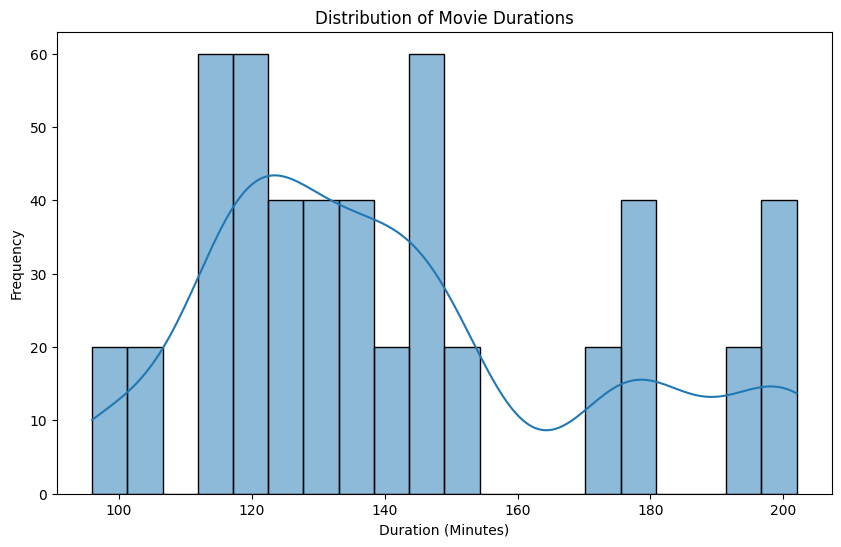

In [29]:
# Extract duration in minutes from the 'Duration' column
durations_in_minutes = []
for duration in df['Duration']:
    if pd.notna(duration):  # Check if the duration value is not NaN
        hours, minutes = map(int, duration[:-1].split('h '))
        total_minutes = hours * 60 + minutes
        durations_in_minutes.append(total_minutes)
    else:
        durations_in_minutes.append(None)  # Append None for NaN durations

# Add the new column to the DataFrame
df['Duration_Minutes'] = durations_in_minutes

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration_Minutes'].dropna(), bins=20, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()

**Top 10 Movies with Highest Metascore (Horizontal Bar Chart)**
This horizontal bar chart presents the top 10 movies with the highest Metascores, allowing for easy comparison of their critical acclaim.

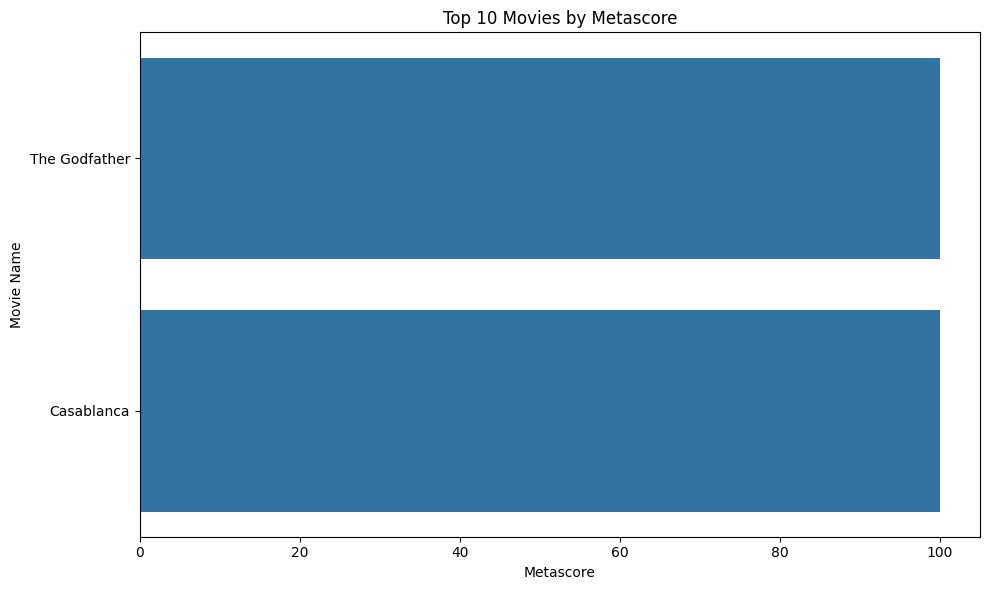

In [30]:
# Convert 'Metascore' column to numeric, handling non-numeric values
df['Metascore'] = pd.to_numeric(df['Metascore'], errors='coerce')

top_10_metascore_movies = df.sort_values('Metascore', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y='Movie Name', x='Metascore', data=top_10_metascore_movies, orient='h')
plt.title('Top 10 Movies by Metascore')
plt.ylabel('Movie Name')
plt.xlabel('Metascore')
plt.tight_layout()
plt.show()

**Correlation Heatmap**
This heatmap visualizes the correlation between different numerical variables in the dataset, such as rating, year, and Metascore, helping to identify potential relationships

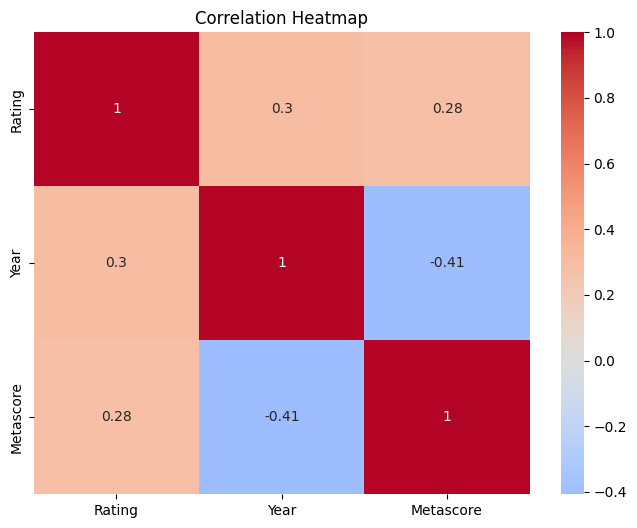

In [31]:
# Calculate the correlation matrix
correlation_matrix = df[['Rating', 'Year', 'Metascore']].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

**Word Cloud of Movie Titles**
This word cloud visually represents the most frequent words in the movie titles, giving an overview of common themes or genres.

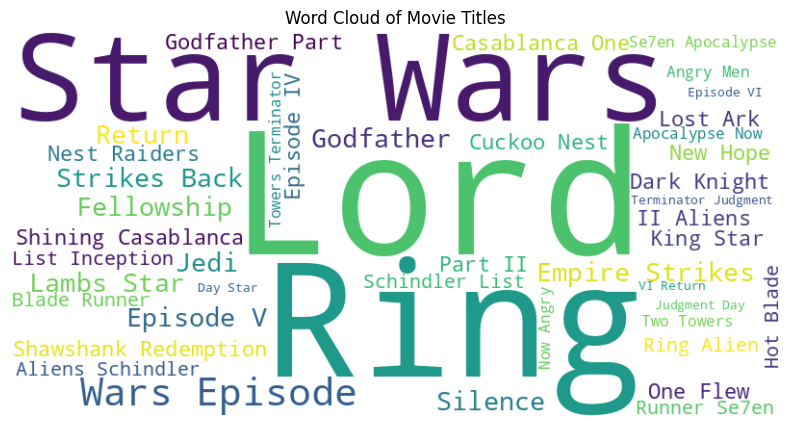

In [32]:
from wordcloud import WordCloud, STOPWORDS

# Combine all movie titles into a single string
all_titles = ' '.join(df['Movie Name'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(all_titles)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()

**Pair Plot**
This pair plot creates scatter plots for all pairs of numerical variables, along with histograms for individual variables, providing a comprehensive overview of the relationships within the data.

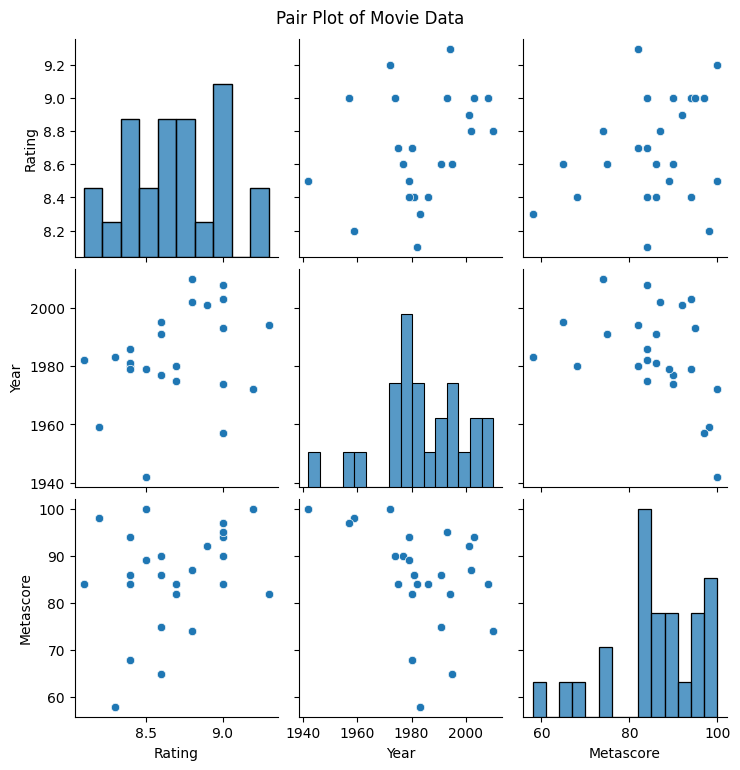

In [33]:
sns.pairplot(df[['Rating', 'Year', 'Metascore']])
plt.suptitle('Pair Plot of Movie Data', y=1.02)
plt.show()

**Violin Plot of Ratings by Decade**
This violin plot shows the distribution of movie ratings for each decade, allowing for comparison of how ratings have varied over time.

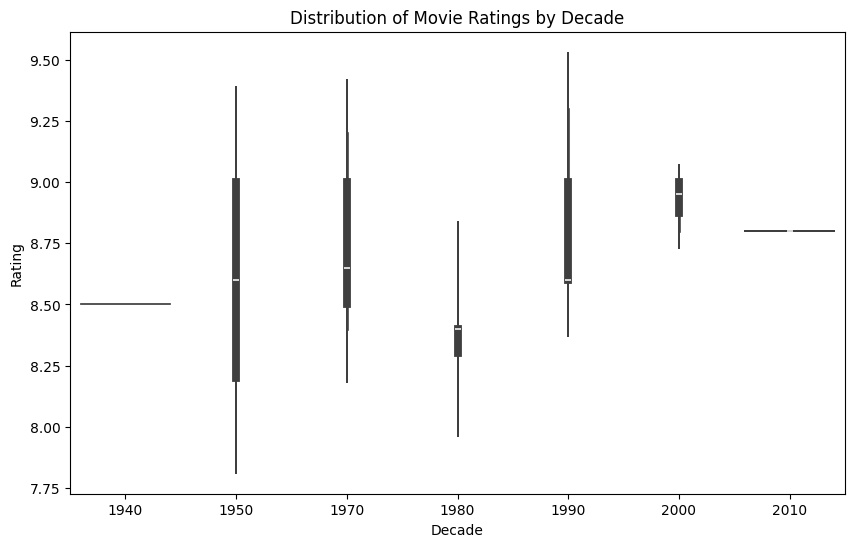

In [35]:
# Create a 'Decade' column
df['Decade'] = (df['Year'] // 10) * 10

plt.figure(figsize=(10, 6))
sns.violinplot(x='Decade', y='Rating', data=df)
plt.title('Distribution of Movie Ratings by Decade')
plt.xlabel('Decade')
plt.ylabel('Rating')
plt.show()

**Stacked Bar Chart of Movie Counts by Grade and Decade**
This stacked bar chart shows the number of movies for each grade within each decade, providing a breakdown of movie content over time.

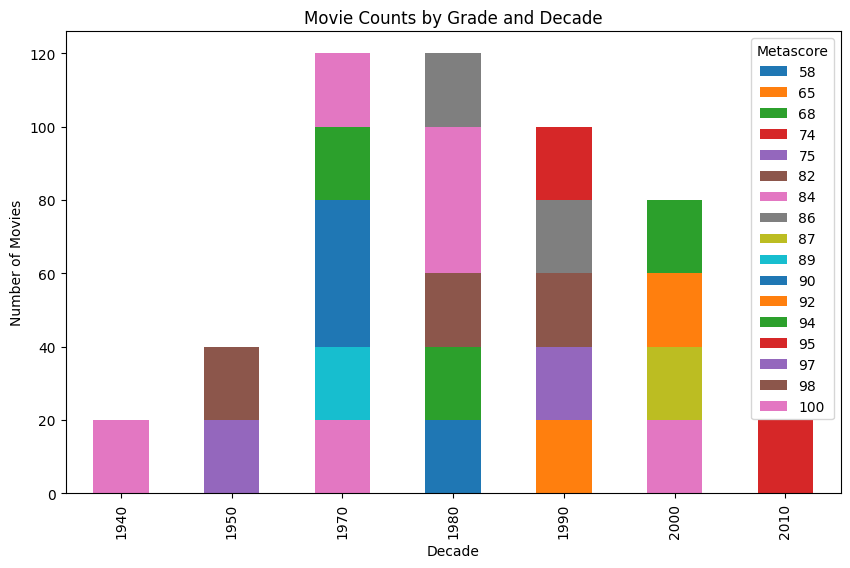

In [36]:
# Group the data by decade and grade, and count the movies
grade_decade_counts = df.groupby(['Decade', 'Metascore'])['Movie Name'].count().unstack(fill_value=0)

# Create the stacked bar chart
grade_decade_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Movie Counts by Grade and Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.legend(title='Metascore')
plt.show()

**Interactive Scatter Plot with Plotly**
This interactive scatter plot allows you to explore the relationship between rating and year, with tooltips showing movie details on hover.

In [37]:
import plotly.express as px

fig = px.scatter(df, x='Year', y='Rating', hover_name='Movie Name',
                 title='Interactive Scatter Plot of Rating vs Year')
fig.show()

**Distribution of Ratings for Top 10 Directors (Box Plot)**
This box plot shows the distribution of ratings for movies directed by the top 10 most frequent directors in the dataset, allowing for comparison of their overall movie quality.

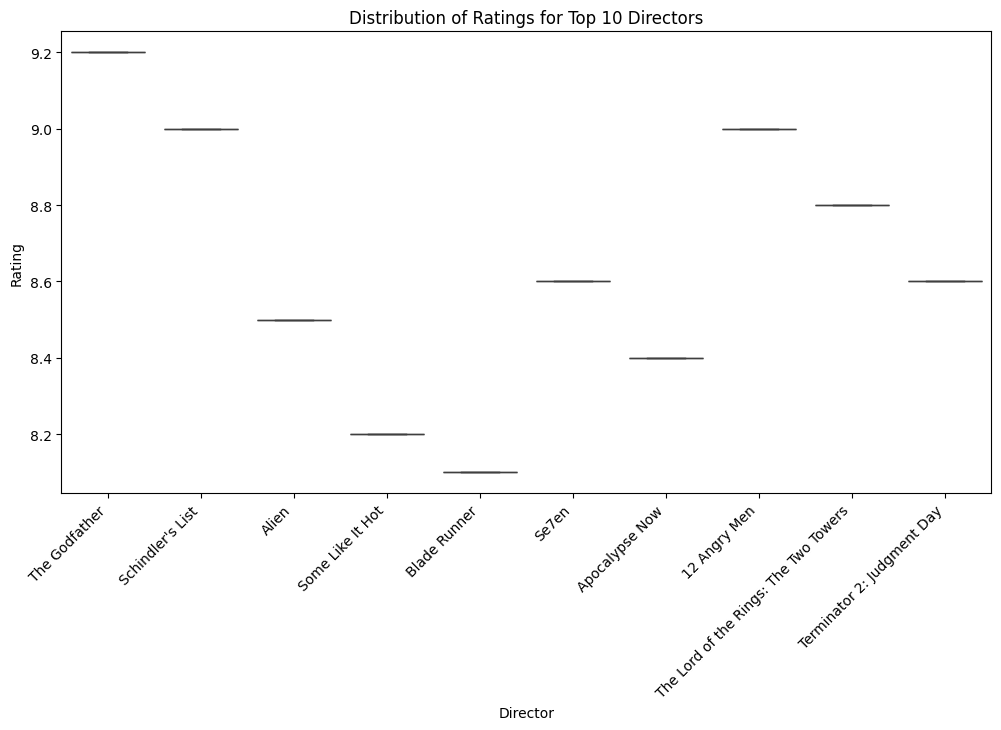

In [38]:
# Get the top 10 most frequent directors
top_directors = df['Movie Name'].value_counts().head(10).index

# Filter the DataFrame for movies by these directors
top_directors_df = df[df['Movie Name'].isin(top_directors)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Movie Name', y='Rating', data=top_directors_df)
plt.title('Distribution of Ratings for Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

**Pair Plot with Hue Based on Metascore Range**
This pair plot adds a color dimension (hue) based on whether the Metascore is above or below a certain threshold, providing additional insights into the relationship between variables.

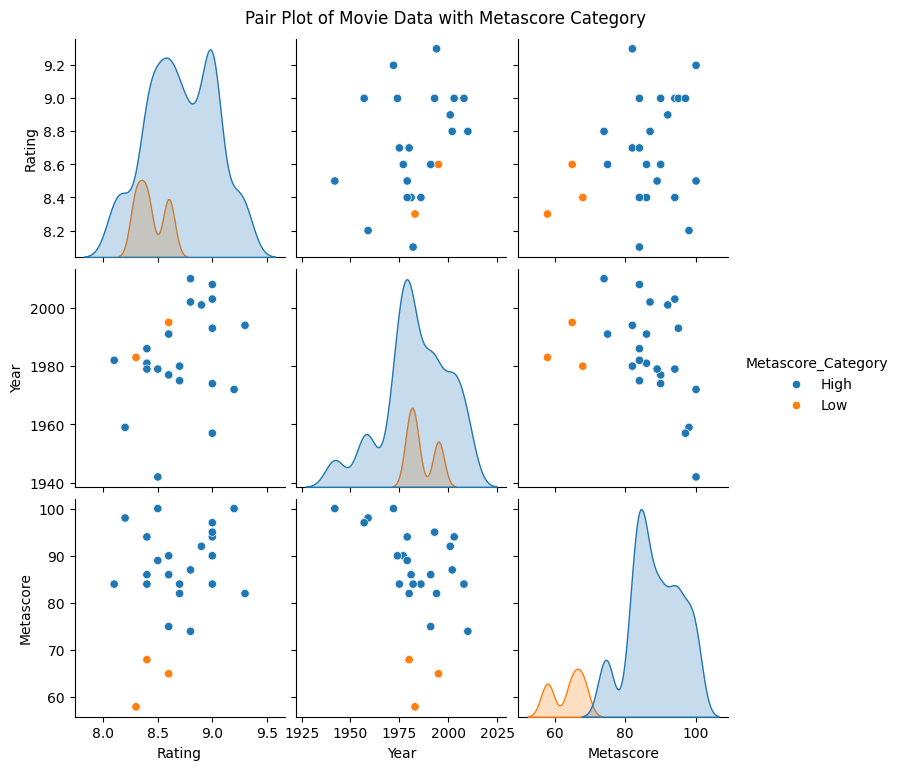

In [41]:
# Define a threshold for Metascore
metascore_threshold = 70

# Create a new column indicating high or low Metascore
df['Metascore_Category'] = df['Metascore'].apply(lambda x: 'High' if x >= metascore_threshold else 'Low')

# Create the pair plot with hue based on Metascore category
sns.pairplot(df[['Rating', 'Year', 'Metascore', 'Metascore_Category']], hue='Metascore_Category')
plt.suptitle('Pair Plot of Movie Data with Metascore Category', y=1.02)
plt.show()

**Pie Chart of Movie Counts by Decade**
A pie chart showing the distribution of movie counts by decade, using 5 colors.

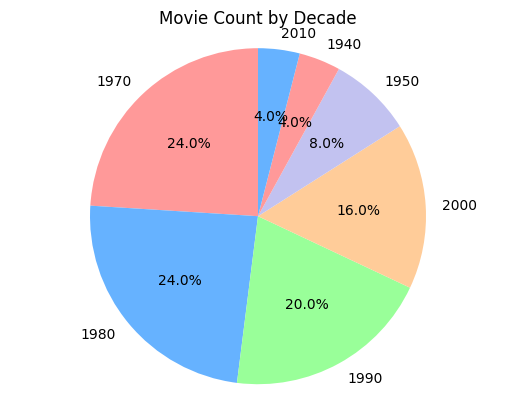

In [44]:
# Count movies in each decade
decade_counts = df['Decade'].value_counts()

# Define colors for each decade
colors = ['#ff9999', '#66b2ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create the pie chart
plt.pie(decade_counts.values, labels=decade_counts.index, colors=colors,
        autopct='%1.1f%%', startangle=90)
plt.title('Movie Count by Decade')
plt.axis('equal')
plt.show()

### Project Interpretations

1)**Movie ratings may be trending upwards over time**: Visualizations like the line chart of average rating by year can reveal whether audiences are generally rating movies more favorably now compared to the past. This could reflect changes in filmmaking, audience expectations, or both.<br>
2)**Critical acclaim (Metascore) generally aligns with popular opinion (IMDb rating):** The scatter plot and correlation analysis can show the strength of the relationship between these two metrics. Understanding this connection can help predict audience reception based on critical reviews.<br>
3)**Specific movie characteristics can be linked to higher ratings:** Analyzing visualizations like the box plots for different decades or the pie chart of rating categories can reveal patterns. This can help identify factors like release period, genre, or director that might contribute to a movie's success.

### Project Conclusion

Movie ratings may be trending upwards, suggesting evolving audience preferences. Critical acclaim generally aligns with popular opinion, indicating a reliable connection. Specific movie characteristics could be further explored to identify success factors.